In [47]:
import pandas as pd
import numpy as np
#import ordinary_least_squares as ols
from ordinary_least_squares import *
import matplotlib.pyplot as plt

In [30]:
gss = pd.read_csv('../datasets/gss.csv', low_memory=False) 
gss_2010 = gss.loc[gss["yrint"] == 2010].dropna(subset=['paeduc', 'maeduc', 'age', 'educ'])
X, y = gss_2010[['paeduc', 'maeduc', 'age']], gss_2010['educ']

In [31]:
'''Fitting a model using numpy arrays'''

X_numpy = np.hstack([np.ones((np.asarray(X, dtype=float).shape[0], 1)), np.asarray(X, dtype=float)])
y_numpy = np.asarray(y, dtype=float)
np_model = LinearRegressionOLS().fit(X_numpy, y_numpy, feature_names=['const', 'paeduc','maeduc','age'], target_name="Education")
print(X_numpy, y_numpy)
print(np_model)

[[ 1.  8.  3. 31.]
 [ 1. 18.  6. 23.]
 [ 1.  2.  0. 82.]
 ...
 [ 1. 12. 14. 54.]
 [ 1.  6. 12. 57.]
 [ 1. 12. 12. 30.]] [16. 16. 10. ... 12. 16. 14.]

OLS Regression Results
Dependent:                Education
-----------------------------------
 
const                     7.3256***
                           (0.3684)
 
paeduc                    0.2144***
                           (0.0241)
 
maeduc                    0.2569***
                           (0.0271)
 
age                       0.0241***
                           (0.0043)

-----------------------------------
R-squared                     0.276
Adjusted R-squared            0.274
F Statistic                 177.548
Observations               1402.000
Log Likelihood            -3359.107
AIC                        6726.213
BIC                        6747.196
*p<0.1; **p<0.05; ***p<0.01



In [32]:
'''Fitting a model with pandas dataframe'''

X_const = X.copy()
X_const.insert(0, 'const', np.ones(len(X)))
model = LinearRegressionOLS().fit(X_const, y)
print(model)


OLS Regression Results
Dependent:                     educ
-----------------------------------
 
const                     7.3256***
                           (0.3684)
 
paeduc                    0.2144***
                           (0.0241)
 
maeduc                    0.2569***
                           (0.0271)
 
age                       0.0241***
                           (0.0043)

-----------------------------------
R-squared                     0.276
Adjusted R-squared            0.274
F Statistic                 177.548
Observations               1402.000
Log Likelihood            -3359.107
AIC                        6726.213
BIC                        6747.196
*p<0.1; **p<0.05; ***p<0.01



In [33]:
'''Display stacked regression outputs'''

print(summary([model, np_model], 15, 20))


OLS Regression Results
Dependent:                     educ      Education
--------------------------------------------------
 
const                     7.3256***      7.3256***
                           (0.3684)       (0.3684)
 
paeduc                    0.2144***      0.2144***
                           (0.0241)       (0.0241)
 
maeduc                    0.2569***      0.2569***
                           (0.0271)       (0.0271)
 
age                       0.0241***      0.0241***
                           (0.0043)       (0.0043)

--------------------------------------------------
R-squared                     0.276          0.276
Adjusted R-squared            0.274          0.274
F Statistic                 177.548        177.548
Observations               1402.000       1402.000
Log Likelihood            -3359.107      -3359.107
AIC                        6726.213       6726.213
BIC                        6747.196       6747.196
*p<0.1; **p<0.05; ***p<0.01



In [34]:
'''Tabular coefficient information'''

pd.DataFrame(model.coefficient_table())

feature  coefficient      se  t_statistic  P>|t| conf_interval__0.05
0   const       7.3256  0.3684      19.8870  0.000      [6.603, 8.048]
1  paeduc       0.2144  0.0241       8.8796  0.000      [0.167, 0.262]
2  maeduc       0.2569  0.0271       9.4725  0.000       [0.204, 0.31]
3     age       0.0241  0.0043       5.5789  0.000      [0.016, 0.033]

In [35]:
'''Tabular variance inflation factor readings'''

pd.DataFrame(model.variance_inflation_factor())

feature     VIF
0  paeduc  2.0233
1  maeduc  2.0285
2     age  1.0971

In [36]:
'''Tabular robust standard errors'''

pd.DataFrame(model.robust_se(type="HC3"))

feature  robust_se   robust_t      robust_p
0   const   0.434460  16.861504  0.000000e+00
1  paeduc   0.023602   9.084741  0.000000e+00
2  maeduc   0.029439   8.727734  0.000000e+00
3     age   0.004221   5.715290  1.336690e-08

In [37]:
'''Array prediction'''

model.predict(np.array([[0, 0, 0], ]))

array([7.32564767])

In [38]:
'''Tabular predictions'''

prediction_set = [
    np.array([[0, 0, 0], ]),
    np.array([[X['paeduc'].mean(), X['maeduc'].mean(), X['age'].mean(),], ]),
    np.array([[X['paeduc'].mean(), 14,  X['age'].mean()], ]),
    np.array([[11.624822, 11.659058, 48.225392], ]),
    np.array([[8, 14,  X['age'].mean()], ]),
] 
predictions = pd.concat([pd.DataFrame(model.predict(test_set, return_table=True)) for test_set in prediction_set], ignore_index=True)
predictions

features  prediction  std_error  \
0  {'paeduc': '0.00', 'maeduc': '0.00', 'age': '0...      7.3256     0.3684   
1  {'paeduc': '11.62', 'maeduc': '11.66', 'age': ...     13.9772     0.0710   
2  {'paeduc': '11.62', 'maeduc': '14.00', 'age': ...     14.5786     0.0953   
3  {'paeduc': '11.62', 'maeduc': '11.66', 'age': ...     13.9772     0.0710   
4  {'paeduc': '8.00', 'maeduc': '14.00', 'age': '...     13.8014     0.1560   

   t_statistic  P>|t|  ci_low_0.05  ci_high_0.05  
0      19.8870    0.0       6.6030        8.0483  
1     196.7284    0.0      13.8378       14.1165  
2     152.9974    0.0      14.3917       14.7656  
3     196.7284    0.0      13.8378       14.1165  
4      88.4816    0.0      13.4954       14.1074

In [44]:
model.feature_names[1:]

Index(['paeduc', 'maeduc', 'age'], dtype='object')

In [39]:
'''Incremental predictions holding other values at sample mean'''

prediction_set = [
    (np.array([[i, X['maeduc'].mean(), X['age'].mean()],]))
    for i in range(int(X['paeduc'].min()), int(X['paeduc'].max())+1)
    ] 
predictions = pd.concat([pd.DataFrame(model.predict(i, return_table=True)) for i in prediction_set], ignore_index=True)
predictions

features  prediction  std_error  \
0   {'paeduc': '0.00', 'maeduc': '11.66', 'age': '...     11.4846     0.2896   
1   {'paeduc': '1.00', 'maeduc': '11.66', 'age': '...     11.6990     0.2662   
2   {'paeduc': '2.00', 'maeduc': '11.66', 'age': '...     11.9134     0.2430   
3   {'paeduc': '3.00', 'maeduc': '11.66', 'age': '...     12.1278     0.2201   
4   {'paeduc': '4.00', 'maeduc': '11.66', 'age': '...     12.3423     0.1974   
5   {'paeduc': '5.00', 'maeduc': '11.66', 'age': '...     12.5567     0.1750   
6   {'paeduc': '6.00', 'maeduc': '11.66', 'age': '...     12.7711     0.1533   
7   {'paeduc': '7.00', 'maeduc': '11.66', 'age': '...     12.9855     0.1324   
8   {'paeduc': '8.00', 'maeduc': '11.66', 'age': '...     13.1999     0.1127   
9   {'paeduc': '9.00', 'maeduc': '11.66', 'age': '...     13.4144     0.0952   
10  {'paeduc': '10.00', 'maeduc': '11.66', 'age': ...     13.6288     0.0812   
11  {'paeduc': '11.00', 'maeduc': '11.66', 'age': ...     13.8432     0.0726   
12  {'paeduc': '12.00', 'maeduc': '11.66', 'age': ...     14.0576     0.0716   
13  {'paeduc': '13.00', 'maeduc': '11.66', 'age': ...     14.2720     0.0784   
14  {'paeduc': '14.00', 'maeduc': '11.66', 'age': ...     14.4865     0.0913   
15  {'paeduc': '15.00', 'maeduc': '11.66', 'age': ...     14.7009     0.1081   
16  {'paeduc': '16.00', 'maeduc': '11.66', 'age': ...     14.9153     0.1273   
17  {'paeduc': '17.00', 'maeduc': '11.66', 'age': ...     15.1297     0.1480   
18  {'paeduc': '18.00', 'maeduc': '11.66', 'age': ...     15.3441     0.1695   
19  {'paeduc': '19.00', 'maeduc': '11.66', 'age': ...     15.5586     0.1917   
20  {'paeduc': '20.00', 'maeduc': '11.66', 'age': ...     15.7730     0.2144   

    t_statistic  P>|t|  ci_low_0.05  ci_high_0.05  
0       39.6620    0.0      10.9166       12.0526  
1       43.9452    0.0      11.1768       12.2212  
2       49.0201    0.0      11.4367       12.3902  
3       55.1134    0.0      11.6962       12.5595  
4       62.5393    0.0      11.9551       12.7294  
5       71.7361    0.0      12.2133       12.9001  
6       83.3162    0.0      12.4704       13.0718  
7       98.1061    0.0      12.7259       13.2452  
8      117.0875    0.0      12.9788       13.4211  
9      140.8904    0.0      13.2276       13.6011  
10     167.9212    0.0      13.4696       13.7880  
11     190.5925    0.0      13.7007       13.9857  
12     196.2714    0.0      13.9171       14.1981  
13     181.9825    0.0      14.1182       14.4259  
14     158.6529    0.0      14.3073       14.6656  
15     135.9656    0.0      14.4888       14.9130  
16     117.1510    0.0      14.6655       15.1651  
17     102.2488    0.0      14.8395       15.4200  
18      90.5001    0.0      15.0115       15.6767  
19      81.1438    0.0      15.1824       15.9347  
20      73.5832    0.0      15.3525       16.1935

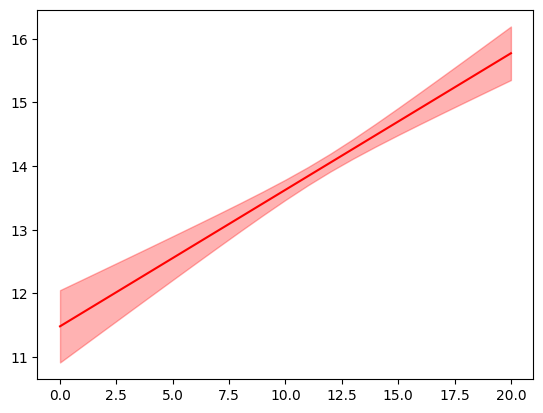

In [53]:
plt.plot(list(range(0, len(predictions['prediction']))), predictions['prediction'], color="red", label=" ")
plt.fill_between(list(range(0, len(predictions['prediction']))), predictions['ci_low_0.05'], predictions['ci_high_0.05'], color="red", alpha=0.3)
plt.show()

In [40]:
dydx = [predictions['prediction'][i+1] - predictions['prediction'][i] for i in list(range(0, len(predictions['prediction'])-1))]
dydx = dydx.copy()
dydx.insert(0, 0)

ci_low_dydx, ci_high_dydx = predictions['ci_low_0.05'], predictions['ci_high_0.05']
dydx_low_ci = [ci_low_dydx[i+1] - ci_low_dydx[i] for i in list(range(0, len(predictions['prediction'])-1))]
dydx_high_ci = [ci_high_dydx[i+1] - ci_high_dydx[i] for i in list(range(0, len(predictions['prediction'])-1))]

dydx_low_ci.insert(0, 0)
dydx_high_ci.insert(0, 0)

derivative_predictions = predictions[['std_error', 't_statistic', 'P>|t|']].copy()
derivative_predictions['derivative'] = dydx
derivative_predictions['ci_low_dydx'] = dydx_low_ci
derivative_predictions['ci_high_dydx'] = dydx_high_ci

In [41]:
derivative_predictions

std_error  t_statistic  P>|t|  derivative  ci_low_dydx  ci_high_dydx
0      0.2896      39.6620    0.0      0.0000       0.0000        0.0000
1      0.2662      43.9452    0.0      0.2144       0.2602        0.1686
2      0.2430      49.0201    0.0      0.2144       0.2599        0.1690
3      0.2201      55.1134    0.0      0.2144       0.2595        0.1693
4      0.1974      62.5393    0.0      0.2145       0.2589        0.1699
5      0.1750      71.7361    0.0      0.2144       0.2582        0.1707
6      0.1533      83.3162    0.0      0.2144       0.2571        0.1717
7      0.1324      98.1061    0.0      0.2144       0.2555        0.1734
8      0.1127     117.0875    0.0      0.2144       0.2529        0.1759
9      0.0952     140.8904    0.0      0.2145       0.2488        0.1800
10     0.0812     167.9212    0.0      0.2144       0.2420        0.1869
11     0.0726     190.5925    0.0      0.2144       0.2311        0.1977
12     0.0716     196.2714    0.0      0.2144       0.2164        0.2124
13     0.0784     181.9825    0.0      0.2144       0.2011        0.2278
14     0.0913     158.6529    0.0      0.2145       0.1891        0.2397
15     0.1081     135.9656    0.0      0.2144       0.1815        0.2474
16     0.1273     117.1510    0.0      0.2144       0.1767        0.2521
17     0.1480     102.2488    0.0      0.2144       0.1740        0.2549
18     0.1695      90.5001    0.0      0.2144       0.1720        0.2567
19     0.1917      81.1438    0.0      0.2145       0.1709        0.2580
20     0.2144      73.5832    0.0      0.2144       0.1701        0.2588

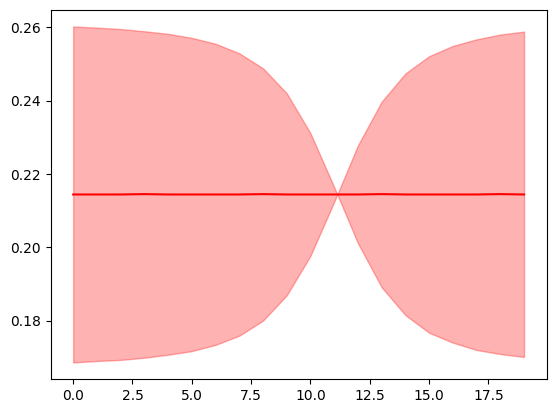

In [52]:
plt.plot(list(range(0, len(derivative_predictions['derivative'][1:]))), derivative_predictions['derivative'][1:], color="red", label=" ")
plt.fill_between(list(range(0, len(derivative_predictions['derivative'][1:]))), derivative_predictions['ci_low_dydx'][1:], derivative_predictions['ci_high_dydx'][1:], color="red", alpha=0.3)
plt.show()

In [ ]:
'''Hypothesis testing two arrays'''

results = model.hypothesis_testing(test=np.array([[0, 0, 0], ]), hyp=np.array([[1, 1, 1], ]))
print(results['summary'])
pd.DataFrame(results['table']).T

Significance Analysis (p > |t|)
1.96 > |-1.3451| == True

Fail to reject the null hypothesis: 7.3256 is not statistically different from 7.8211 at 5.0% level

Conclude that outcome of {'paeduc': '0.00', 'maeduc': '0.00', 'age': '0.00'}
does not differ from {'paeduc': '1.00', 'maeduc': '1.00', 'age': '1.00'}


0
feature_labels     {'paeduc': '0.00', 'maeduc': '0.00', 'age': '0...
hypothesis_labels  {'paeduc': '1.00', 'maeduc': '1.00', 'age': '1...
prediction                                                  7.325648
hypothesis                                                  7.821124
t-statistic                                                -1.345073
P>|t|                                                        0.17882

In [ ]:
'''Hypothesis testing array with fixed value'''

results = model.hypothesis_testing(test=np.array([[0, 0, 0], ]), hyp=7.325648)
print(results['summary'])
pd.DataFrame(results['table']).T

Significance Analysis (p > |t|)
1.96 > |-0.0000| == True

Fail to reject the null hypothesis: 7.3256 is not statistically different from 7.3256 at 5.0% level

Conclude that outcome of {'paeduc': '0.00', 'maeduc': '0.00', 'age': '0.00'}
does not differ from {'educ': '7.325648'}


0
feature_labels     {'paeduc': '0.00', 'maeduc': '0.00', 'age': '0...
hypothesis_labels                               {'educ': '7.325648'}
prediction                                                  7.325648
hypothesis                                                  7.325648
t-statistic                                                -0.000001
P>|t|                                                       0.999999

In [ ]:
'''Reject the null hypothesis'''

results = model.hypothesis_testing(test=np.array([[0, 0, 0], ]), hyp=np.array([[5, 5, 5], ]))
print(results['summary'])
pd.DataFrame(results['table']).T

Significance Analysis (p > |t|)
1.96 > |-6.7254| == False

Reject the null hypothesis: 7.3256 is statistically different from 9.8030 at 5.0% level

Conclude that the outcomes of {'paeduc': '0.00', 'maeduc': '0.00', 'age': '0.00'}
differs significantly from {'paeduc': '5.00', 'maeduc': '5.00', 'age': '5.00'}


0
feature_labels     {'paeduc': '0.00', 'maeduc': '0.00', 'age': '0...
hypothesis_labels  {'paeduc': '5.00', 'maeduc': '5.00', 'age': '5...
prediction                                                  7.325648
hypothesis                                                  9.803031
t-statistic                                                -6.725365
P>|t|                                                            0.0

## Test Cases

In [ ]:
def simple_data():
    np.random.seed(35)
    X = np.column_stack([np.ones(100), np.random.randn(100, 2)])
    y = X @ np.array([1, 2, 3]) + np.random.randn(100) * 0.1
    return X, y

def fitted_model(simple_data):
    X, y = simple_data
    return LinearRegressionOLS().fit(X, y)

def perfect_fit_data():
    """Data with no noise for perfect fit"""
    np.random.seed(123)
    X = np.column_stack([np.ones(50), np.random.randn(50, 2)])
    y = X @ np.array([5, -2, 3])
    return X, y

def dataframe_data():
    """Fixture providing pandas DataFrame/Series data"""
    np.random.seed(35)
    df = pd.DataFrame({
        'const': np.ones(100),
        'feature_A': np.random.randn(100),
        'feature_B': np.random.randn(100)
    })
    y = pd.Series(
        df.values @ np.array([1, 2, 3]) + np.random.randn(100) * 0.1,
        name='target_variable'
    )
    return df, y

### Model Test

In [ ]:
"""Model is fitted correctly."""
X, y = simple_data()
model = LinearRegressionOLS().fit(X, y)

print(f"Populated coefficients:           {model.theta is not None}, {model.theta}")
print(f"R-squared valid:                  {model.r_squared > 0.9}, {model.r_squared}")
print(f"Same # Coefficients as X columns: {len(model.theta) == X.shape[1]}, ({len(model.theta)}, {X.shape[1]})")

Populated coefficients:           True, [0.99413776 1.99584237 2.99279632]
R-squared valid:                  True, 0.9993370417147871
Same # Coefficients as X columns: True, (3, 3)


In [ ]:
"""Perfect fit model is correct"""
X, y = perfect_fit_data()
model = LinearRegressionOLS().fit(X, y)

print(f"100% of variance is explained by alpha: {model.r_squared == 1}, {model.r_squared}")

100% of variance is explained by alpha: True, 1.0


In [ ]:
"""Test prediction returns correct shape"""
# 10 samples, 2 features (no intercept)
X_test = np.random.randn(10, 2)                    
y_pred = fitted_model(simple_data()).predict(X_test)

print(f"Predictions return a list: {y_pred.shape == (10,)}, {y_pred.shape}" )

Predictions return a list: True, (10,)


In [ ]:
"""Test prediction on single sample"""
X_test = np.array([[0.5, -0.5]])
y_pred = fitted_model(simple_data()).predict(X_test)

print(f"Prediction returns a single value: {isinstance(y_pred, (float, np.ndarray))}, {y_pred}")

Prediction returns a single value: True, [0.49566078]


In [ ]:
"""Test that we can recover known coefficients exactly"""
X, y = perfect_fit_data()
model = LinearRegressionOLS().fit(X, y)

print(f"Recovering known coefficients: {np.round(model.theta,4) == [5, -2, 3]}")

Recovering known coefficients: [ True  True  True]


### Dimensionality Test

In [ ]:
"""Test dimension mismatch raises error"""
X = np.random.randn(100, 3)
y = np.random.randn(50)
try:
    LinearRegressionOLS().fit(X, y)
except ValueError as error:
    print(error)

X and y must have same number of observations. Got X: 100, y: 50 instead.


In [ ]:
"""Test that NaN in X raises error"""
X, y = np.random.randn(100, 3), np.random.randn(100)
X[0, 0] = np.nan
try:
    LinearRegressionOLS().fit(X, y)
except ValueError as error:
    print(f"{error}\nX[0] = {X[0]}")

X contains NaN or infinite values.
X[0] = [        nan -1.26254374 -1.40298909]


In [ ]:
"""Test that NaN in y raises error"""
X, y = np.random.randn(100, 3), np.random.randn(100)
y[0] = np.nan
try:
    LinearRegressionOLS().fit(X, y)
except ValueError as error:
    print(f"{error}\ny[0] = {y[0]}")

y contains NaN or infinite values.
y[0] = nan


In [ ]:
"""Test that Inf in X raises error"""
X, y = np.random.randn(100, 3), np.random.randn(100)
X[0, 0] = np.inf
try:
    LinearRegressionOLS().fit(X, y)
except ValueError as error:
    print(f"{error}\nX[0] = {X[0]}")

X contains NaN or infinite values.
X[0] = [        inf -0.21264967  0.17293329]


In [ ]:
"""Test that empty X raises error"""
X = np.array([]).reshape(0, 3)
y = np.array([])
try:
    LinearRegressionOLS().fit(X, y)
except ValueError as error:
    print(error)

X and y cannot be empty


In [ ]:
"""Test that 1D X raises error"""
X = np.random.randn(100)
y = np.random.randn(100)
try:
    LinearRegressionOLS().fit(X, y)
except ValueError as error:
    print(error)

X must be 2D, got shape (100,) instead.


In [ ]:
"""Test that 2D column vector y gets flattened to list"""
X = np.random.randn(100, 3)
y = np.random.randn(100, 1)
model = LinearRegressionOLS().fit(X, y)

print(f"Y transformed to 1D: {model.y.ndim == 1}, {y.shape} -> {model.y.shape}")

Y transformed to 1D: True, (100, 1) -> (100,)


In [ ]:
"""Test that n <= k raises error"""
X = np.random.randn(5, 6)  # 5 observations, 6 features
y = np.random.randn(5)
try:
    LinearRegressionOLS().fit(X, y)
except ValueError as error:
    print(error)

Insufficient observations. Need n > k, got n=5, k=6 instead.


In [ ]:
"""Test that invalid alpha raises error"""
X = np.random.randn(100, 3)
y = np.random.randn(100)
try:
    LinearRegressionOLS().fit(X, y, alpha=1.5)
except ValueError as error:
    print(error)

Alpha must be between 0 and 1, got 1.5 instead.


In [ ]:
"""Test that predict raises error if model not fitted"""
model = LinearRegressionOLS()
X_test = np.random.randn(10, 3)
try:
    model.predict(X_test)
except ValueError as error:
    print(error)

Model is not fitted. Call 'fit' with arguments before using this method.


### Multicollinearity Test

In [ ]:
"""Test that perfect multicollinearity raises error"""
X = np.column_stack([
    np.ones(50),
    np.arange(50),
    2 * np.arange(50)  # Perfect collinearity with column 1
])
y = np.random.randn(50)
try:
    LinearRegressionOLS().fit(X, y)
except ValueError as error:
    print(error)

Matrix X'X is not positive definite. This typically indicates:
- Perfect multicollinearity between features
- Insufficient observations (n < k)
- Constant or duplicate columns in X


In [ ]:
"""Test that duplicate columns raise error"""
X = np.column_stack([
    np.ones(50),
    np.random.randn(50),
    np.random.randn(50)
])
X[:, 2] = X[:, 1]  # Make column 2 identical to column 1
y = np.random.randn(50)
try:
    LinearRegressionOLS().fit(X, y)
except ValueError as error:
    print(error)

Matrix X'X is not positive definite. This typically indicates:
- Perfect multicollinearity between features
- Insufficient observations (n < k)
- Constant or duplicate columns in X


In [ ]:
"""Test that constant non-intercept column causes issues"""
X = np.column_stack([
    np.ones(50),
    np.ones(50),  # Another constant column
    np.random.randn(50)
])
y = np.random.randn(50)
try:
    LinearRegressionOLS().fit(X, y)
except ValueError as error:
    print(error)

Matrix X'X is not positive definite. This typically indicates:
- Perfect multicollinearity between features
- Insufficient observations (n < k)
- Constant or duplicate columns in X


In [ ]:
"""Test that near-collinear features produce ill condition matrix"""
np.random.seed(35)
target_cond = 1e10
noise_level = 1 / np.sqrt(target_cond) 
x1 = np.random.randn(100)
x2 = x1 + np.random.randn(100) * noise_level
X = np.column_stack([np.ones(100), x1, x2])
y = np.random.randn(100)

xtx = X.T @ X
cond_number = np.linalg.cond(xtx)
print(cond_number > 1e10, cond_number)

try:
    model = LinearRegressionOLS().fit(X, y)
    print(np.all(np.isfinite(model.theta)), model.theta)
    print(np.any(model.std_error_coefficient > 100), model.std_error_coefficient, "\n")
    print(pd.DataFrame(model.variance_inflation_factor()), "\n")
except ValueError as error:
    print(error)

True 42017828394.54631
True [-6.12545902e-02  4.07485362e+03 -4.07486072e+03]
True [9.82041850e-02 9.31031715e+03 9.31030290e+03] 

     feature  VIF
0  Feature 1  inf
1  Feature 2  inf 



/tmp/ipykernel_49246/3496828753.py:15: UserWarning: X'X matrix is ill-conditioned (cond=4.20e+10).
Results may be unreliable. Consider:
- Removing collinear features
- Scaling features
- Using regularization

  model = LinearRegressionOLS().fit(X, y)


### Statistics Testing

In [ ]:
"""Test that residuals sum to approximately zero"""
np.isclose(np.sum(fitted_model(simple_data()).residuals), 0, atol=1e-10)

np.True_

In [ ]:
"""Test that RSS + ESS = TSS"""
np.isclose(
    fitted_model(simple_data()).rss + fitted_model(simple_data()).ess,
    fitted_model(simple_data()).tss,
    rtol=1e-10
)

np.True_

In [ ]:
"""Test that r-squared is between 0 and 1"""
0 <= fitted_model(simple_data()).r_squared <= 1

np.True_

In [ ]:
"""Test that adjusted r-squared <= r-squared"""
fitted_model(simple_data()).r_squared_adjusted <= fitted_model(simple_data()).r_squared

np.True_

In [ ]:
"""Test that MSE is positive"""
fitted_model(simple_data()).mse > 0

np.True_

In [ ]:
"""Test that RMSE = sqrt(MSE)"""
np.isclose(fitted_model(simple_data()).rmse, np.sqrt(fitted_model(simple_data()).mse))

np.True_

In [ ]:
"""Test degrees of freedom calculation"""
n, k = fitted_model(simple_data()).X.shape
fitted_model(simple_data()).degrees_freedom == n - k

True

In [ ]:
"""Test that F-statistic is positive"""
fitted_model(simple_data()).f_statistic > 0

np.True_

In [ ]:
"""Test that BIC >= AIC for typical sample sizes"""
if fitted_model(simple_data()).X.shape[0] > 8:  # When n > e^2
    print(fitted_model(simple_data()).bic > fitted_model(simple_data()).aic)

True


### Inference Test

In [ ]:
"""Test that confidence intervals contain true parameter values"""
X, y = perfect_fit_data()
model = LinearRegressionOLS().fit(X, y, alpha=0.05)
true_params = np.array([5, -2, 3])

# Floating point error.
for i, true_val in enumerate(true_params):
    print(model.ci_low[i])
    print(model.ci_high[i])
    print(model.ci_low[i] <= true_val <= model.ci_high[i])

4.999999999999999
5.000000000000001
True
-2.0
-1.9999999999999991
True
2.999999999999998
2.9999999999999987
False


In [ ]:
"""Test that narrower alpha gives narrower CIs"""
X, y = simple_data()
model_95 = LinearRegressionOLS().fit(X, y, alpha=0.05)
model_99 = LinearRegressionOLS().fit(X, y, alpha=0.01)
width_95 = model_95.ci_high - model_95.ci_low
width_99 = model_99.ci_high - model_99.ci_low

np.all(width_99 > width_95)

np.True_

In [ ]:
"""Test t-statistic calculation"""
expected_t = fitted_model(simple_data()).theta / fitted_model(simple_data()).std_error_coefficient
fitted_model(simple_data()).t_stat_coefficient == expected_t

array([ True,  True,  True])

In [ ]:
"""Test that p-values are between 0 and 1"""
print(np.all(fitted_model(simple_data()).p_value_coefficient >= 0))
print(np.all(fitted_model(simple_data()).p_value_coefficient <= 1))

True
True


In [ ]:
"""Test that significant coefficients have low p-values"""
X, y = perfect_fit_data()
model = LinearRegressionOLS().fit(X, y)
np.all(model.p_value_coefficient < 0.001)

np.True_

### Edge Case Testing

In [ ]:
"""Test regression with single feature (intercept only)"""
np.random.seed(35)
X = np.ones((100, 1))
y = np.random.randn(100) + 5
model = LinearRegressionOLS().fit(X, y)
np.isclose(model.theta[0], np.mean(y), atol=0.1)

np.True_

In [ ]:
"""Test with minimum number of observations (n = k + 1)"""
X = np.column_stack([np.ones(4), np.random.randn(4, 2)])
y = np.random.randn(4)
model = LinearRegressionOLS().fit(X, y)
print(model.theta is not None)
print(model.degrees_freedom == 1)

True
True


In [ ]:
"""Test with very large coefficient values"""
np.random.seed(35)
X = np.column_stack([np.ones(100), np.random.randn(100, 2)])
y = X @ np.array([1e6, 1e6, 1e6]) + np.random.randn(100)
model = LinearRegressionOLS().fit(X, y)
print(model.theta is not None)
print(np.all(np.isfinite(model.theta)))

True
True


In [ ]:
"""Test with very small coefficient values"""
np.random.seed(35)
X = np.column_stack([np.ones(100), np.random.randn(100, 2)])
y = X @ np.array([1e-6, 1e-6, 1e-6]) + np.random.randn(100) * 1e-6
model = LinearRegressionOLS().fit(X, y)
print(model.theta is not None)
print(np.all(np.isfinite(model.theta)))

True
True
